In [13]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [15]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv")
df.head()

Unnamed: 0        DATE  CSUSHPISA  ASPNHSUS  CPIHOSNS  EVACANTUSQ176N  \
0           0  2003-07-01    133.777  248400.0     185.9    15614.000000   
1           1  2003-08-01    134.969  241000.0     186.1    15627.333333   
2           2  2003-09-01    136.294  254500.0     185.8    15640.666667   
3           3  2003-10-01    137.531  242800.0     185.7    15654.000000   
4           4  2003-11-01    138.794  268300.0     185.1    15734.333333   

         GDI        GDP  LFUN25TTUSM647S  MORTGAGE30US  ...       POP  \
0  11565.399  11566.669        5218000.0        5.6325  ...  290820.0   
1  11565.399  11566.669        5258000.0        6.2640  ...  291072.0   
2  11565.399  11566.669        5223000.0        6.1475  ...  291321.0   
3  11734.357  11772.234        5237000.0        5.9520  ...  291574.0   
4  11734.357  11772.234        5040000.0        5.9325  ...  291807.0   

   QTAXT01QTAXCAT1USNO  TLRESCONS  USAUCSFRCONDOSMSAMID  UMCSENT  UNRATE  \
0              60429.0   454040.0         152803.936875     90.9     6.2   
1              60429.0   458676.0         153889.750099     89.3     6.1   
2              60429.0   463954.0         155038.700765     87.7     6.1   
3             108519.0   475234.0         156198.110739     89.6     6.0   
4             108519.0   490441.0         157276.235923     93.7     5.8   

   FEDFUNDS  Year  Month  Day  
0      1.01  2003      7    1  
1      1.03  2003      8    1  
2      1.01  2003      9    1  
3      1.01  2003     10    1  
4      1.00  2003     11    1  

[5 rows x 23 columns]

In [16]:
df.columns

Index(['Unnamed: 0', 'DATE', 'CSUSHPISA', 'ASPNHSUS', 'CPIHOSNS',
       'EVACANTUSQ176N', 'GDI', 'GDP', 'LFUN25TTUSM647S', 'MORTGAGE30US',
       'MSPNHSUS', 'PERMIT', 'PERMIT1', 'POP', 'QTAXT01QTAXCAT1USNO',
       'TLRESCONS', 'USAUCSFRCONDOSMSAMID', 'UMCSENT', 'UNRATE', 'FEDFUNDS',
       'Year', 'Month', 'Day'],
      dtype='object')

In [17]:
#df['Unnamed'].drop
df = df.drop(['Unnamed: 0'], axis=1)

In [18]:
df.corr()[0:1].T

CSUSHPISA
CSUSHPISA              1.000000
ASPNHSUS               0.950814
CPIHOSNS               0.881721
EVACANTUSQ176N        -0.705599
GDI                    0.882451
GDP                    0.883816
LFUN25TTUSM647S       -0.500539
MORTGAGE30US          -0.000251
MSPNHSUS               0.938959
PERMIT                 0.403346
PERMIT1                0.210128
POP                    0.709861
QTAXT01QTAXCAT1USNO    0.416566
TLRESCONS              0.903571
USAUCSFRCONDOSMSAMID   0.996151
UMCSENT               -0.198552
UNRATE                -0.546394
FEDFUNDS               0.307523
Year                   0.761222
Month                 -0.013566
Day                         NaN

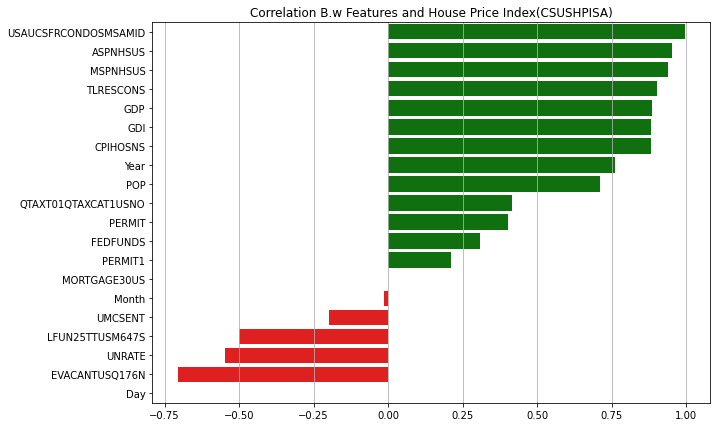

In [19]:
Feature_Name = df.corr()[0:1].T.index.to_list()
Feature_corr = df.corr()[0:1].T.values.reshape(-1)

feature_correlationvalue = {}


for i in range(len(Feature_corr)):
     feature_correlationvalue.update({Feature_Name[i]:Feature_corr[i]})

del feature_correlationvalue['CSUSHPISA']

sorted_feature_correlationvalue  = dict(sorted(feature_correlationvalue.items(),key=lambda item : item[1],reverse=True))
plt.figure(figsize=(10, 7))

correlation_values = [i for i in sorted_feature_correlationvalue.values()]

feature_names = [i for i in sorted_feature_correlationvalue.keys()]

colors = ['red' if value < 0 else 'green' for value in correlation_values]

plt.grid(True)

sns.barplot(x=correlation_values, y=feature_names, palette=colors).set(title='Correlation B.w Features and House Price Index(CSUSHPISA)')

plt.show()
     

###### Observation : 
Correlation Explanation

Strong Positive Correlation:

 USAUCSFRCONDOSMSAMID (Zillow Home Value Index): 0.9952

    Very strong correlation b.w ZHVI and HPI , so it tells ZHVI increases HPI tend to inceases

  ASPNHSUS (Average Sales Price for New Houses Sold): 0.9442

    Very Strong positive correlation b.w Mean sales price and HPI so HPI tend to increase

  MSPNHSUS (Median Sales Price for New Houses Sold): 0.9348

    Similar to ASPNHSUS , the MSPNHSUS has strong positve correlation


Moderate Positive Correlation:

 GDI (Gross Domestic Income): 0.8626


 TLRESCONS (Total Construction Spending - Residential): 0.8879

Weak Positive Correlation:

 POP (Total Population): 0.6990

 QTAXT01QTAXCAT1USNO (Property Taxes): 0.4591
Moderate Negative Correlation

 EVACANTUSQ176N (Housing Inventory Estimate: Vacant Units): -0.5953

    This indicates that increasing in vacant housing units may tend to decrease the house price


 UNRATE (Unemployment Rate): -0.5107

    Unemployment rate increase the HPI tend to decrease


 LFUN25TTUSM647S (Unemployed Population: Aged 25-54): -0.4653

   Unemployment rate of population 25-54 increase the HPI tend to decrease


Weak Negative Correlation

 30-Year Fixed Rate Mortgage Average (MORTGAGE30US): -0.2030

  Mortage rate increase might be decrease the HPI

#### Outliers Detection

In [20]:
df.dtypes
     

DATE                     object
CSUSHPISA               float64
ASPNHSUS                float64
CPIHOSNS                float64
EVACANTUSQ176N          float64
GDI                     float64
GDP                     float64
LFUN25TTUSM647S         float64
MORTGAGE30US            float64
MSPNHSUS                float64
PERMIT                  float64
PERMIT1                 float64
POP                     float64
QTAXT01QTAXCAT1USNO     float64
TLRESCONS               float64
USAUCSFRCONDOSMSAMID    float64
UMCSENT                 float64
UNRATE                  float64
FEDFUNDS                float64
Year                      int64
Month                     int64
Day                       int64
dtype: object

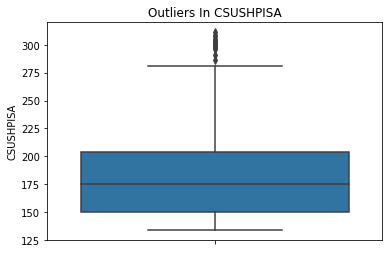

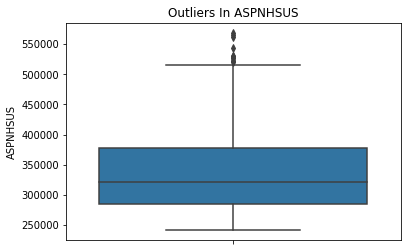

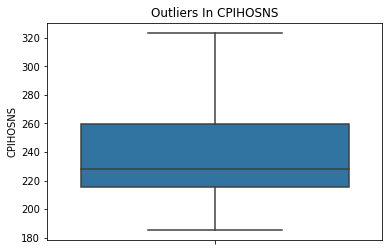

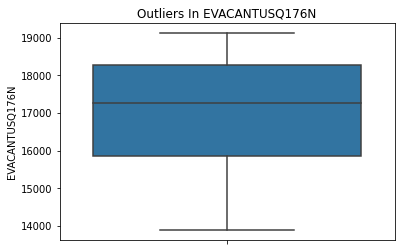

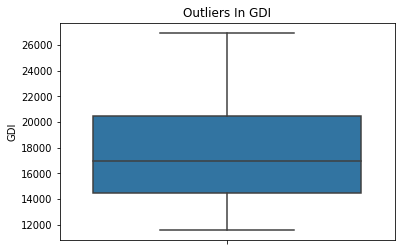

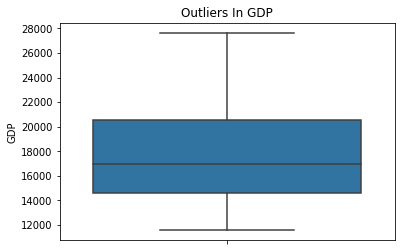

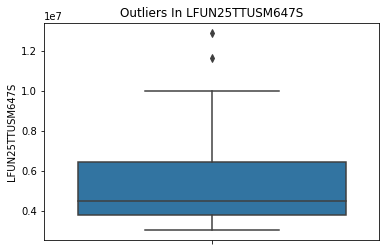

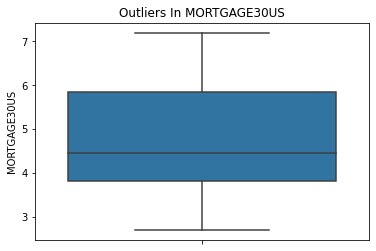

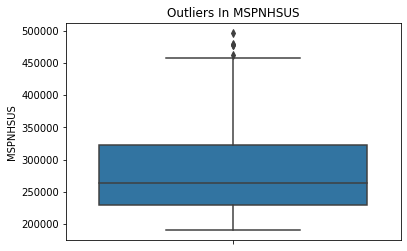

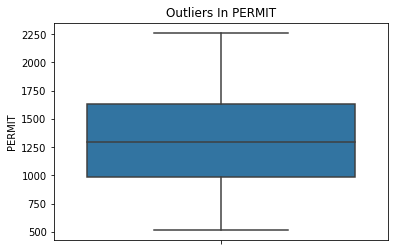

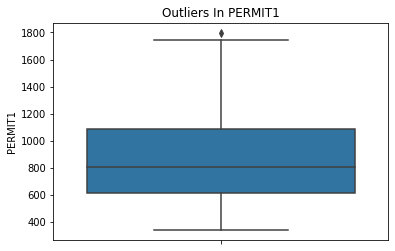

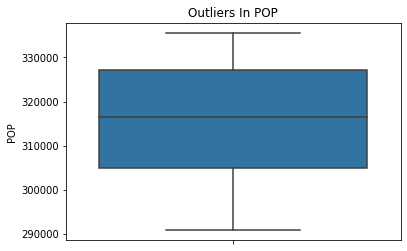

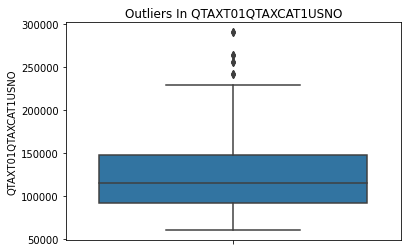

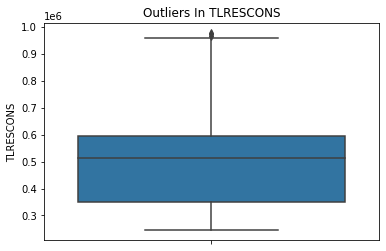

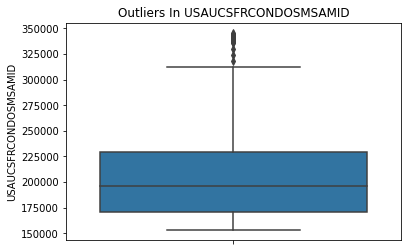

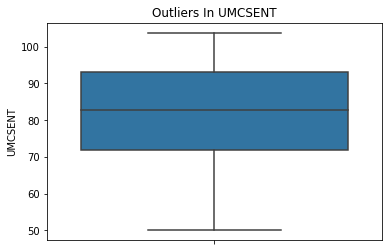

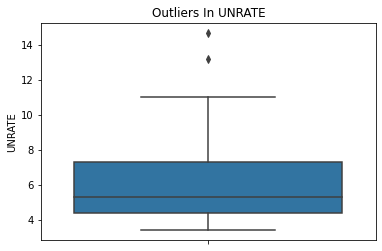

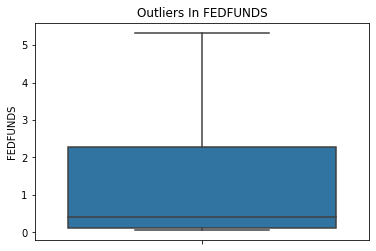

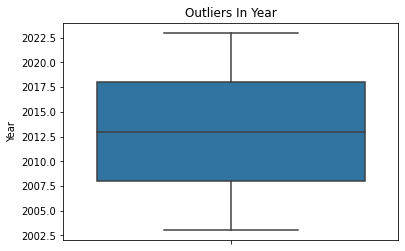

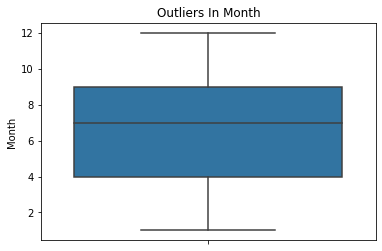

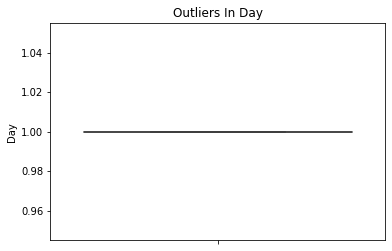

In [21]:
for i in df.drop('DATE',axis=1).columns:
  sns.boxplot(data = df , y=i)
  plt.title(f'Outliers In {i}')
  print()
  print()
  plt.show()

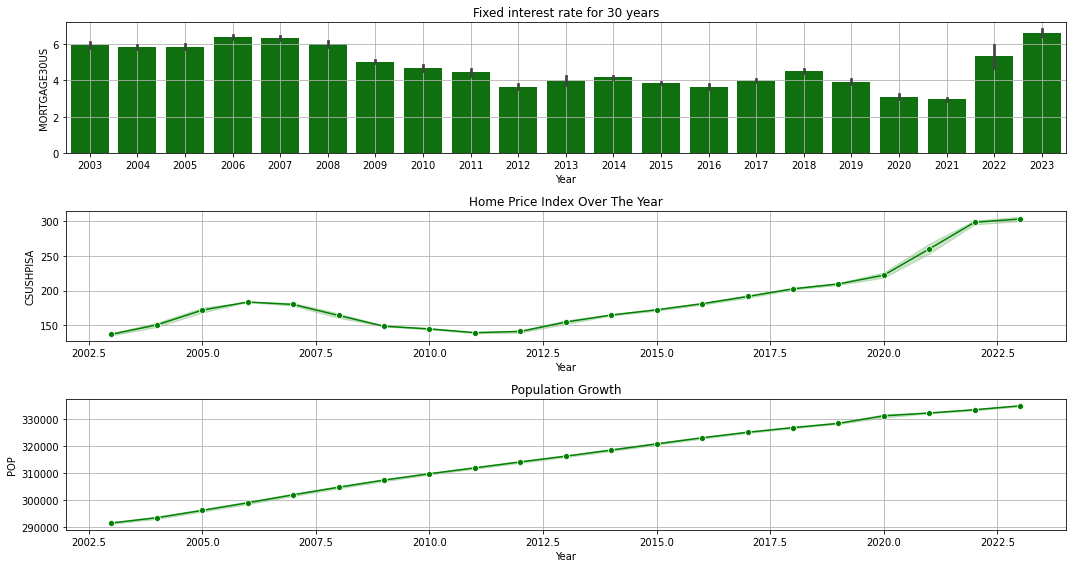

In [22]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 8))

sns.barplot(data=df, x='Year', y='MORTGAGE30US', color='g', ax=ax1).set(title='Fixed interest rate for 30 years')
ax1.grid(True)

sns.lineplot(data=df, x='Year', y='CSUSHPISA', marker='o', color='g', ax=ax2).set(title='Home Price Index Over The Year')
ax2.grid(True)

sns.lineplot(data=df, x='Year', y='POP', marker='o', color='g', ax=ax3).set(title='Population Growth')
ax3.grid(True)
fig.tight_layout()
plt.show()

In [30]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

CSUSHPISA  ASPNHSUS  CPIHOSNS  EVACANTUSQ176N       GDI  \
CSUSHPISA              1.000000  0.950814  0.881721       -0.705599  0.882451   
ASPNHSUS               0.950814  1.000000  0.926500       -0.623470  0.941174   
CPIHOSNS               0.881721  0.926500  1.000000       -0.480428  0.991507   
EVACANTUSQ176N        -0.705599 -0.623470 -0.480428        1.000000 -0.496078   
GDI                    0.882451  0.941174  0.991507       -0.496078  1.000000   
GDP                    0.883816  0.939932  0.994464       -0.492812  0.999288   
LFUN25TTUSM647S       -0.500539 -0.498727 -0.295386        0.447582 -0.354644   
MORTGAGE30US          -0.000251 -0.165328 -0.321496       -0.030795 -0.357838   
MSPNHSUS               0.938959  0.989142  0.943069       -0.616648  0.959044   
PERMIT                 0.403346  0.293065  0.032395       -0.804175  0.079598   
PERMIT1                0.210128  0.075525 -0.181401       -0.699833 -0.141318   
POP                    0.709861  0.820152  0.944473       -0.316312  0.948239   
QTAXT01QTAXCAT1USNO    0.416566  0.485415  0.511388       -0.215811  0.527115   
TLRESCONS              0.903571  0.815875  0.641083       -0.873064  0.663164   
USAUCSFRCONDOSMSAMID   0.996151  0.938566  0.886648       -0.682706  0.879609   
UMCSENT               -0.198552 -0.131534 -0.210130       -0.157847 -0.152679   
UNRATE                -0.546394 -0.540960 -0.347880        0.456250 -0.404212   
FEDFUNDS               0.307523  0.136580 -0.013405       -0.265743 -0.024042   
Year                   0.761222  0.857047  0.964587       -0.382157  0.969354   
Month                 -0.013566  0.006513 -0.018257       -0.056075 -0.016270   
Day                         NaN       NaN       NaN             NaN       NaN   

                           GDP  LFUN25TTUSM647S  MORTGAGE30US  MSPNHSUS  \
CSUSHPISA             0.883816        -0.500539     -0.000251  0.938959   
ASPNHSUS              0.939932        -0.498727     -0.165328  0.989142   
CPIHOSNS              0.994464        -0.295386     -0.321496  0.943069   
EVACANTUSQ176N       -0.492812         0.447582     -0.030795 -0.616648   
GDI                   0.999288        -0.354644     -0.357838  0.959044   
GDP                   1.000000        -0.348884     -0.345699  0.956804   
LFUN25TTUSM647S      -0.348884         1.000000     -0.258126 -0.462699   
MORTGAGE30US         -0.345699        -0.258126      1.000000 -0.234814   
MSPNHSUS              0.956804        -0.462699     -0.234814  1.000000   
PERMIT                0.071496        -0.618574      0.266373  0.264372   
PERMIT1              -0.148015        -0.489906      0.347778  0.043699   
POP                   0.947002        -0.176168     -0.576874  0.856514   
QTAXT01QTAXCAT1USNO   0.525760        -0.140695     -0.287258  0.507232   
TLRESCONS             0.659966        -0.636010      0.126836  0.795931   
USAUCSFRCONDOSMSAMID  0.882598        -0.467361      0.013298  0.927602   
UMCSENT              -0.162211        -0.429883     -0.165236 -0.126467   
UNRATE               -0.399393         0.995521     -0.242322 -0.506295   
FEDFUNDS             -0.018438        -0.556331      0.754325  0.077031   
Year                  0.968146        -0.223129     -0.532614  0.889988   
Month                -0.013406        -0.002356      0.016587  0.001019   
Day                        NaN              NaN           NaN       NaN   

                        PERMIT  ...       POP  QTAXT01QTAXCAT1USNO  TLRESCONS  \
CSUSHPISA             0.403346  ...  0.709861             0.416566   0.903571   
ASPNHSUS              0.293065  ...  0.820152             0.485415   0.815875   
CPIHOSNS              0.032395  ...  0.944473             0.511388   0.641083   
EVACANTUSQ176N       -0.804175  ... -0.316312            -0.215811  -0.873064   
GDI                   0.079598  ...  0.948239             0.527115   0.663164   
GDP                   0.071496  ...  0.947002             0.525760   0.659966   
LFUN25TTUSM647S      

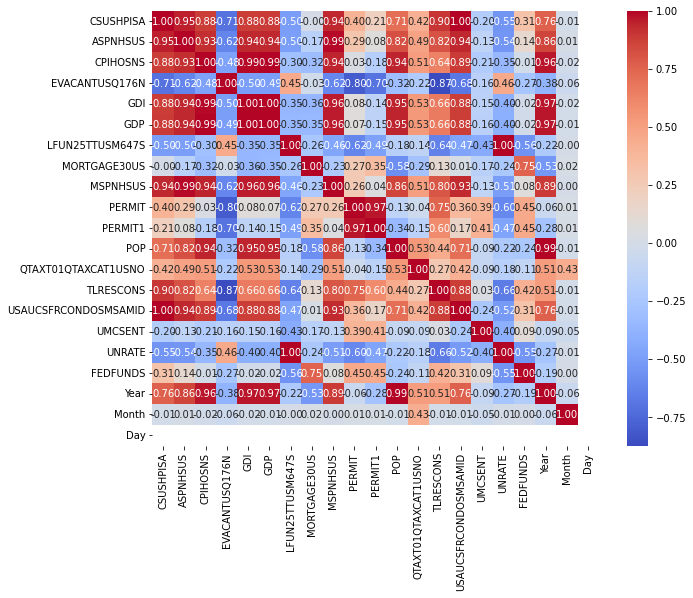

In [31]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
df.corr()

CSUSHPISA  ASPNHSUS  CPIHOSNS  EVACANTUSQ176N       GDI  \
CSUSHPISA              1.000000  0.950814  0.881721       -0.705599  0.882451   
ASPNHSUS               0.950814  1.000000  0.926500       -0.623470  0.941174   
CPIHOSNS               0.881721  0.926500  1.000000       -0.480428  0.991507   
EVACANTUSQ176N        -0.705599 -0.623470 -0.480428        1.000000 -0.496078   
GDI                    0.882451  0.941174  0.991507       -0.496078  1.000000   
GDP                    0.883816  0.939932  0.994464       -0.492812  0.999288   
LFUN25TTUSM647S       -0.500539 -0.498727 -0.295386        0.447582 -0.354644   
MORTGAGE30US          -0.000251 -0.165328 -0.321496       -0.030795 -0.357838   
MSPNHSUS               0.938959  0.989142  0.943069       -0.616648  0.959044   
PERMIT                 0.403346  0.293065  0.032395       -0.804175  0.079598   
PERMIT1                0.210128  0.075525 -0.181401       -0.699833 -0.141318   
POP                    0.709861  0.820152  0.944473       -0.316312  0.948239   
QTAXT01QTAXCAT1USNO    0.416566  0.485415  0.511388       -0.215811  0.527115   
TLRESCONS              0.903571  0.815875  0.641083       -0.873064  0.663164   
USAUCSFRCONDOSMSAMID   0.996151  0.938566  0.886648       -0.682706  0.879609   
UMCSENT               -0.198552 -0.131534 -0.210130       -0.157847 -0.152679   
UNRATE                -0.546394 -0.540960 -0.347880        0.456250 -0.404212   
FEDFUNDS               0.307523  0.136580 -0.013405       -0.265743 -0.024042   
Year                   0.761222  0.857047  0.964587       -0.382157  0.969354   
Month                 -0.013566  0.006513 -0.018257       -0.056075 -0.016270   
Day                         NaN       NaN       NaN             NaN       NaN   

                           GDP  LFUN25TTUSM647S  MORTGAGE30US  MSPNHSUS  \
CSUSHPISA             0.883816        -0.500539     -0.000251  0.938959   
ASPNHSUS              0.939932        -0.498727     -0.165328  0.989142   
CPIHOSNS              0.994464        -0.295386     -0.321496  0.943069   
EVACANTUSQ176N       -0.492812         0.447582     -0.030795 -0.616648   
GDI                   0.999288        -0.354644     -0.357838  0.959044   
GDP                   1.000000        -0.348884     -0.345699  0.956804   
LFUN25TTUSM647S      -0.348884         1.000000     -0.258126 -0.462699   
MORTGAGE30US         -0.345699        -0.258126      1.000000 -0.234814   
MSPNHSUS              0.956804        -0.462699     -0.234814  1.000000   
PERMIT                0.071496        -0.618574      0.266373  0.264372   
PERMIT1              -0.148015        -0.489906      0.347778  0.043699   
POP                   0.947002        -0.176168     -0.576874  0.856514   
QTAXT01QTAXCAT1USNO   0.525760        -0.140695     -0.287258  0.507232   
TLRESCONS             0.659966        -0.636010      0.126836  0.795931   
USAUCSFRCONDOSMSAMID  0.882598        -0.467361      0.013298  0.927602   
UMCSENT              -0.162211        -0.429883     -0.165236 -0.126467   
UNRATE               -0.399393         0.995521     -0.242322 -0.506295   
FEDFUNDS             -0.018438        -0.556331      0.754325  0.077031   
Year                  0.968146        -0.223129     -0.532614  0.889988   
Month                -0.013406        -0.002356      0.016587  0.001019   
Day                        NaN              NaN           NaN       NaN   

                        PERMIT  ...       POP  QTAXT01QTAXCAT1USNO  TLRESCONS  \
CSUSHPISA             0.403346  ...  0.709861             0.416566   0.903571   
ASPNHSUS              0.293065  ...  0.820152             0.485415   0.815875   
CPIHOSNS              0.032395  ...  0.944473             0.511388   0.641083   
EVACANTUSQ176N       -0.804175  ... -0.316312            -0.215811  -0.873064   
GDI                   0.079598  ...  0.948239             0.527115   0.663164   
GDP                   0.071496  ...  0.947002             0.525760   0.659966   
LFUN25TTUSM647S      

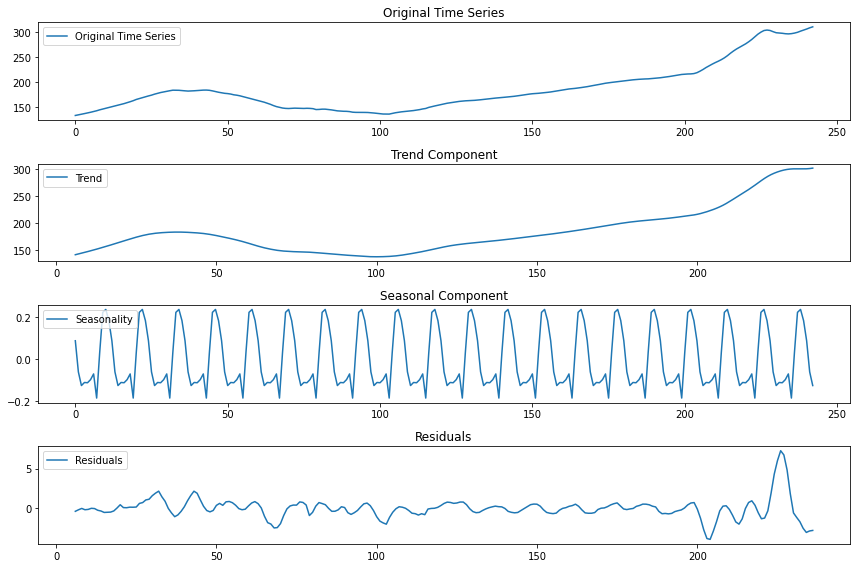

C:\Users\Atharv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


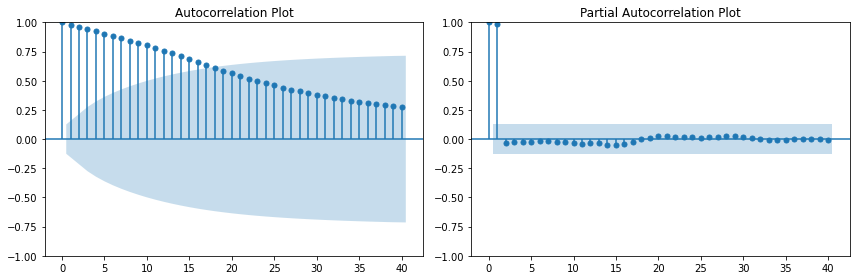

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

Data Visualization:
Visualize the data using various plots and graphs to understand its distribution and trends.

Pairplot for visualizing relationships

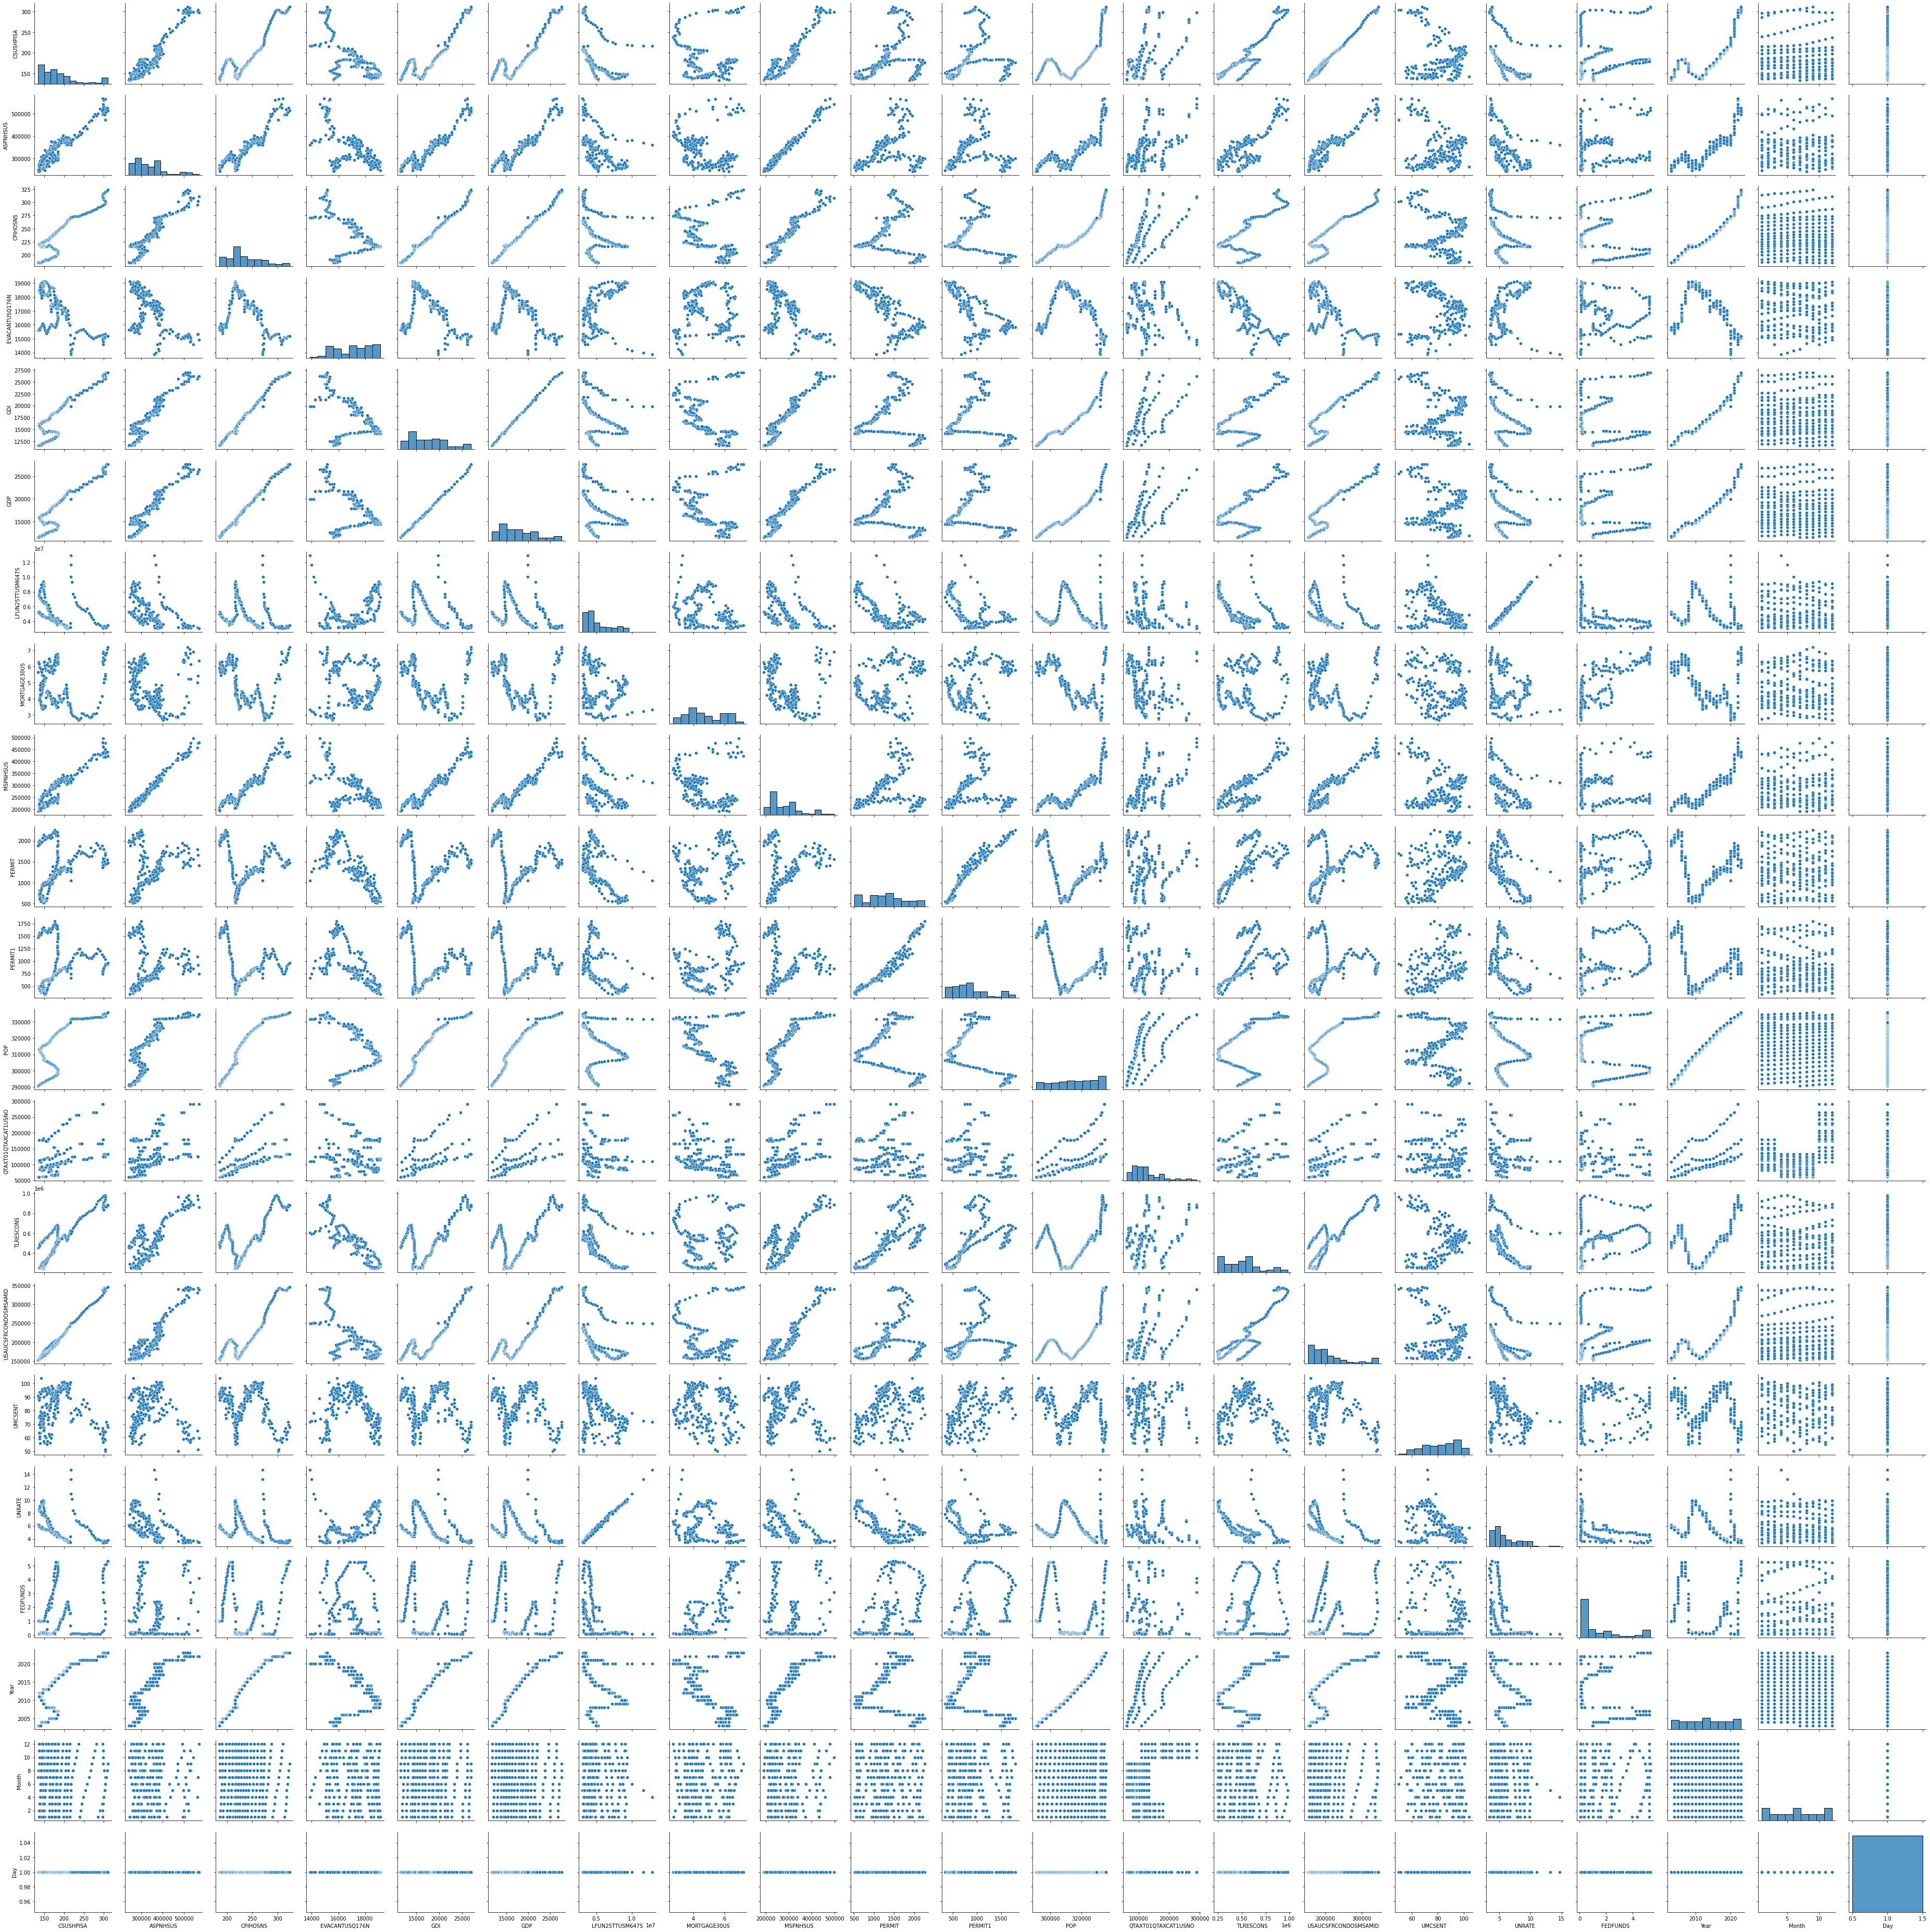

In [37]:
sns.pairplot(df)

In [45]:
df.columns

Index(['CSUSHPISA', 'ASPNHSUS', 'CPIHOSNS', 'EVACANTUSQ176N', 'GDI', 'GDP',
       'LFUN25TTUSM647S', 'MORTGAGE30US', 'MSPNHSUS', 'PERMIT', 'PERMIT1',
       'POP', 'QTAXT01QTAXCAT1USNO', 'TLRESCONS', 'USAUCSFRCONDOSMSAMID',
       'UMCSENT', 'UNRATE', 'FEDFUNDS', 'Year', 'Month', 'Day'],
      dtype='object')

In [40]:
factr = ['CSUSHPISA', 'ASPNHSUS', 'CPIHOSNS', 'EVACANTUSQ176N', 'GDI', 'GDP',
       'LFUN25TTUSM647S', 'MORTGAGE30US', 'MSPNHSUS', 'PERMIT', 'PERMIT1',
       'POP', 'QTAXT01QTAXCAT1USNO', 'TLRESCONS', 'USAUCSFRCONDOSMSAMID',
       'UMCSENT', 'UNRATE', 'FEDFUNDS', 'Year', 'Month', 'Day']

### Histograms and Kernel Density Plots

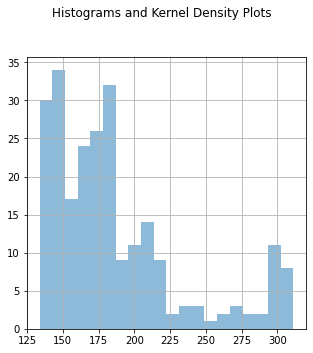

In [61]:
plt.figure(figsize=(13, 8))
df['CSUSHPISA'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

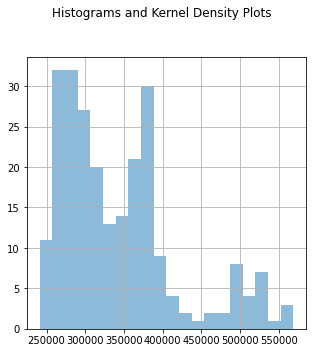

In [62]:
plt.figure(figsize=(13, 8))
df['ASPNHSUS'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [ ]:
df['CPIHOSNS'].hist(bins=20, alpha=0.5,figsize=(5, 5))
df['EVACANTUSQ176N'].hist(bins=20, alpha=0.5,figsize=(5, 5))
df['GDI'].hist(bins=20, alpha=0.5,figsize=(5, 5))
df['GDP'].hist(bins=20, alpha=0.5,figsize=(5, 5))
df['LFUN25TTUSM647S'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

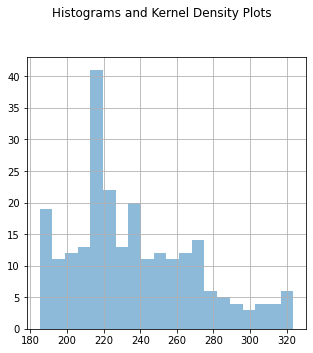

In [63]:
plt.figure(figsize=(13, 8))
df['CPIHOSNS'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

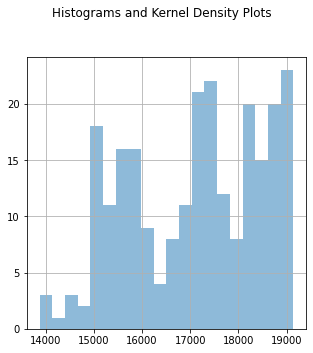

In [64]:
plt.figure(figsize=(13, 8))
df['EVACANTUSQ176N'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

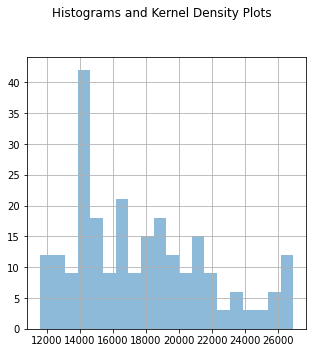

In [65]:
plt.figure(figsize=(13, 8))
df['GDI'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

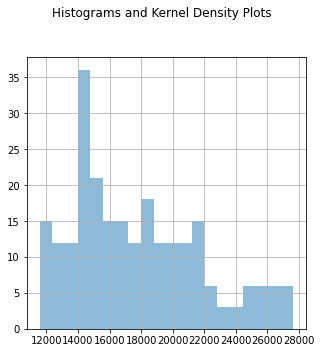

In [66]:
plt.figure(figsize=(13, 8))
df['GDP'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

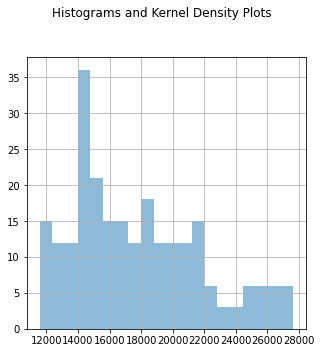

In [67]:
plt.figure(figsize=(13, 8))
df['GDP'].hist(bins=20, alpha=0.5,figsize=(5, 5))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

#### Extracting Features:

In [69]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

#### Plotting scatter plots of the CASE-SHILLER index vs features

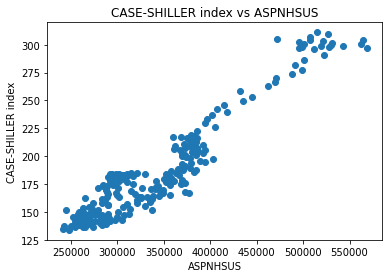

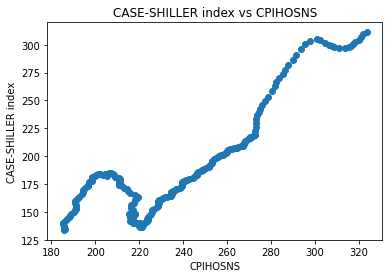

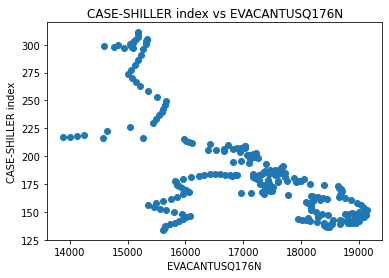

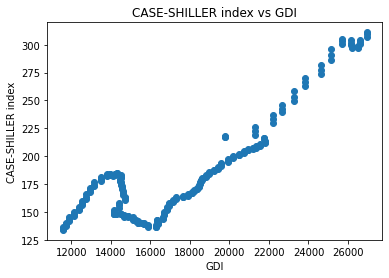

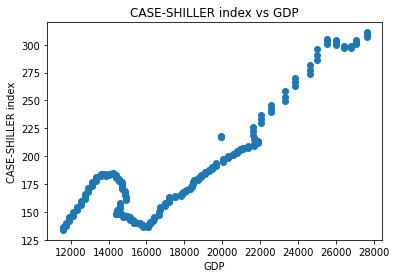

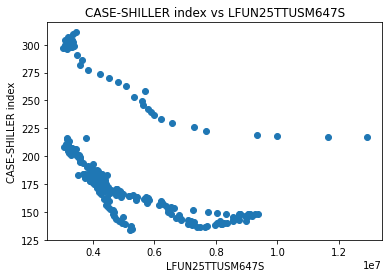

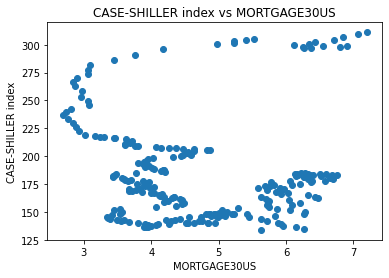

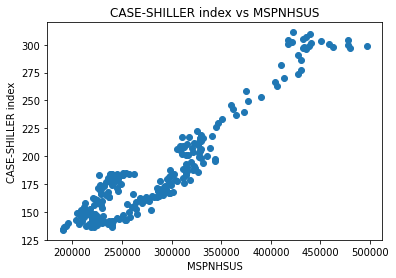

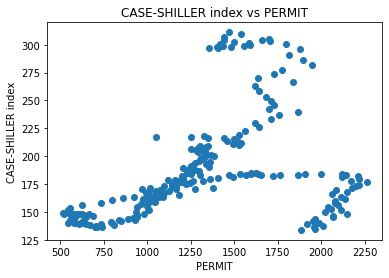

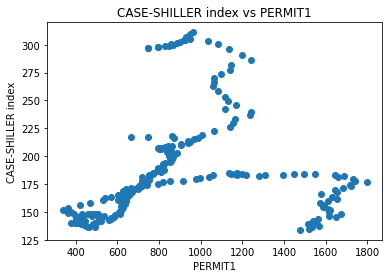

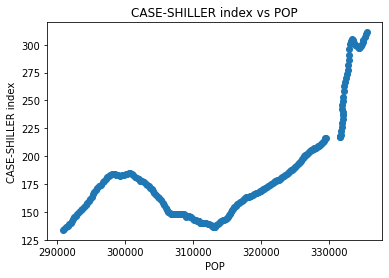

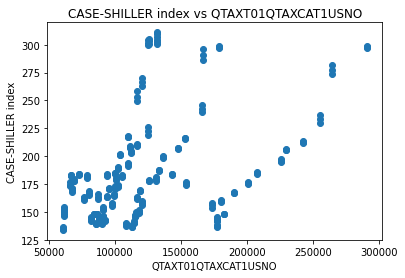

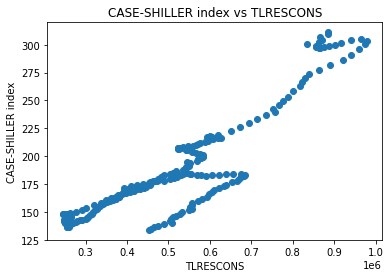

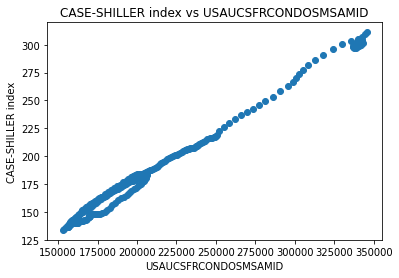

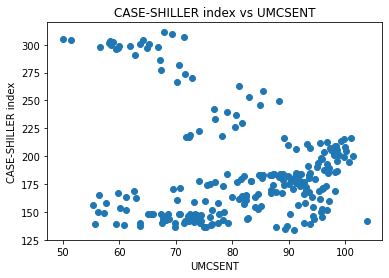

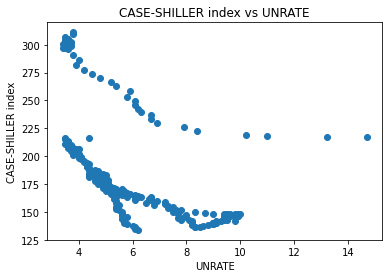

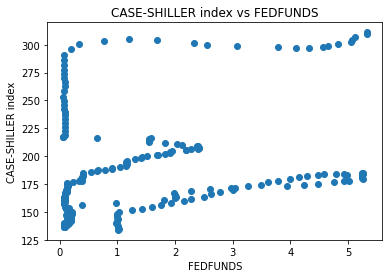

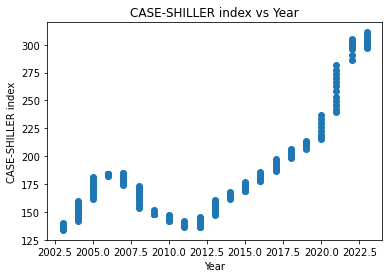

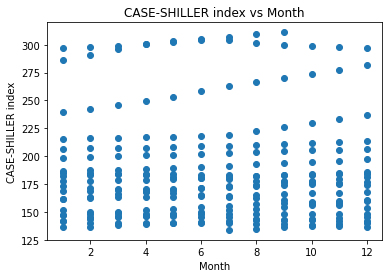

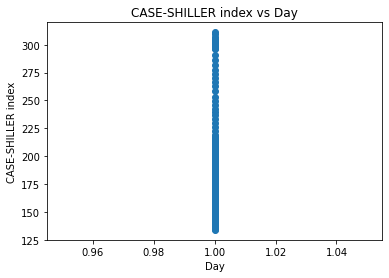

In [70]:
#Plotting scatter plots of the CASE-SHILLER index vs features

# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [80]:
#Calculate correlation coefficients
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Month    0.013566
Year     0.761222
Day           NaN
dtype: float64


Based on the provided correlation coefficients:

Highest Correlation:

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. This feature shows a strong positive linear relationship with home prices.

Other Strong Correlations:

'Cons_Material' (0.898972), 'Subsidy' (0.845065), 'old_age_pop' (0.842396), 'median_income' (0.831509), and 'CPI' (0.822250) also have strong positive correlations.

Moderate Correlations:

'urban_pop_us' (0.788002), 'Num_Households' (0.748972), and 'working_age_pop' (0.619826) have moderate positive correlations.

Lower Correlations:

'UNRATE' (0.475602), 'EmpRate' (0.199060), 'Houses' (0.177683), and 'FEDFUNDS' (0.113791) have lower correlations.

In [81]:
df.columns

Index(['Year', 'Month', 'Day'], dtype='object')

#### Data science models

From the correlation matrix and the scatter plots, the following conclusions can be made-

Unemployment rate is negatively correlated with the home prices. Which makes sense.
Number of new houses has almost 0 correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
Impact of the great recession is reflected in almost all the plots.
Interest rates have a slight negative impact on the home prices.
All the other variables are positively correlated with the home prices.
From the correlation matrix above, it can be seen that several pairs of independent variables have high correlation. Let's drop one column from each such pair as they will cause multicollinearity. We will drop the column which has lower correlation with the target.

In [82]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [83]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [84]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.3098583754505225


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [85]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Year is 121.0316942350256
The coefficient for Month is 8.30419484262222
The coefficient for Day is 0.0


In [86]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  120.30314297853606


The coefficients of the variables are not in sync with their correlation coefficients with the target variable. For example, the coefficient of "UNRATE" (unemployment rate) is positive. It does not make sense as a rise in unemployment will surely lead to a decrease in the home prices. So, the question arises, why did this happen?

"... reason is what some call "real suppression". In this case suppression occurs because an important predictor variable, necessary in understanding the true relationship between the latent variables, suppresses the effect of another predictor variable."

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.